## Given a hex maze configuration, we want a set of next possible barrier sets!

Each new configuration needs to be different by the movement of a single barrier:
1. At least one path must be longer and one must be shorter.
2. The optimal path order must have changed (the pair of reward ports that used to be the closest together or furthest apart is now different).

In [1]:
import pandas as pd

# Load the database and visualize it
df = pd.read_pickle('maze_configuration_database.pkl')
display(df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55891,"(34, 36, 7, 10, 42, 46, 19, 22, 25)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{17},1,[],0,"{(34, 37, 7, 40, 9, 42, 14, 16, 25), (35, 37, ..."
55892,"(37, 7, 9, 13, 45, 16, 22, 25, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[34, 28, 33, 48, 43, 39]]",1,"{(32, 34, 40, 13, 15, 25, 26, 27, 31), (36, 10..."
55893,"(7, 39, 46, 17, 19, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(32, 36, 7, 40, 11, 14, 17, 20, 23), (32, 36,..."
55894,"(34, 10, 11, 42, 45, 15, 22, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...",{16},1,"[[19, 23, 28, 33, 48, 43, 39, 44, 40, 35, 29, ...",1,"{(34, 37, 8, 12, 45, 18, 21, 23, 25), (37, 40,..."


### Getting a new barrier set given an initial barrier set

Given a starting barrier set, let's find all potential next barrier sets that differ by the movement of a single barrier. 

We can also find which one of these is the best (i.e. the optimal paths that the rat can travel between reward ports are maximally different - in number of hexes - from the original barrier set)

Original barrier set: {34, 10, 42, 12, 45, 18, 23, 25, 31}

Potential next barrier sets: [frozenset({34, 10, 12, 45, 18, 22, 23, 25, 31}), frozenset({34, 10, 12, 45, 18, 23, 25, 26, 31}), frozenset({34, 10, 12, 45, 18, 23, 25, 27, 31}), frozenset({34, 10, 12, 45, 18, 21, 23, 25, 31}), frozenset({32, 34, 10, 12, 45, 18, 23, 25, 31})]

Best next barrier set: frozenset({34, 10, 12, 45, 18, 22, 23, 25, 31})
Original barriers:


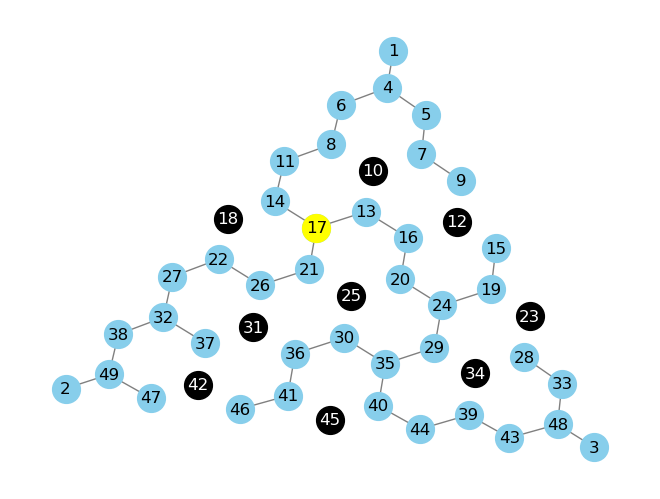

Best next barriers:


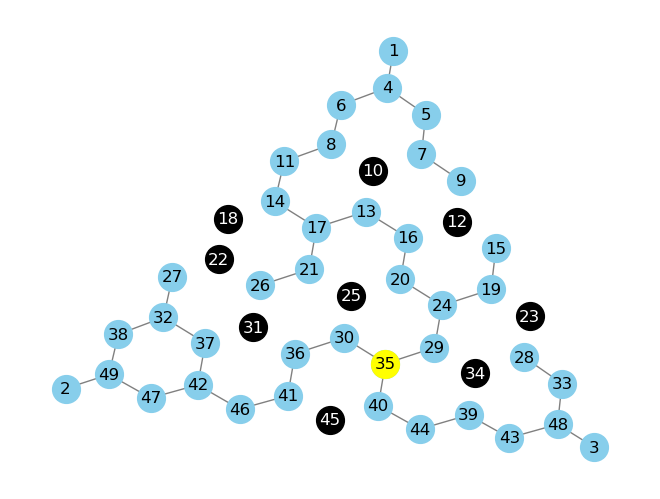

In [2]:
from hex_maze_utils import get_next_barrier_sets, get_best_next_barrier_set, plot_hex_maze, df_lookup

# Here is an example of our original barrier set
original_barriers = {34, 10, 42, 12, 45, 18, 23, 25, 31}
print(f"Original barrier set: {original_barriers}\n")

# Given this set of barriers, we can find all possible sets of next barriers
next_barrier_sets = get_next_barrier_sets(df, original_barriers, criteria_type='ALL')
print(f"Potential next barrier sets: {next_barrier_sets}\n")

# We can also find the "best" one (best = optimal paths maximally different from the original barrier set)
best_next_barrier_set = get_best_next_barrier_set(df, original_barriers)
print(f"Best next barrier set: {best_next_barrier_set}")

# Let's plot the hex mazes of the original barrier set and the best next set to see what this looks like
print("Original barriers:")
plot_hex_maze(original_barriers)
print("Best next barriers:")
plot_hex_maze(best_next_barrier_set)

### Getting a barrier sequence given an initial barrier set

Longer sequences are a bit harder - we want to make sure that each barrier set is different enough from the previous barrier set, AND also different enough from all other previous mazes in the sequence.

To do this, we can set a threshold "min_hex_diff" : this is the combined minimum number of hexes that need to be different on optimal paths to reward ports between ALL mazes in a sequence

Note that this function doesn't necessarily give us the BEST possible barrier sequence, it just gives us a valid sequence. It does ensure that the sequence returned is the longest possible sequence that fits our criteria, but if there were ties for the longest possible sequence, it just returns the first one.

in helper
Current sequence: [{34, 10, 42, 12, 45, 18, 23, 25, 31}]
This is our new longest sequence!
in helper
Current sequence: [{34, 10, 42, 12, 45, 18, 23, 25, 31}, frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})]
This is our new longest sequence!
in helper
Current sequence: [{34, 10, 42, 12, 45, 18, 23, 25, 31}, frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 25, 31})]
This is our new longest sequence!
Sequence at return: [{34, 10, 42, 12, 45, 18, 23, 25, 31}, frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 25, 31})]
in helper
Current sequence: [{34, 10, 42, 12, 45, 18, 23, 25, 31}, frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26})]
in helper
Current sequence: [{34, 10, 42, 12, 45, 18, 23, 25, 31}, frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25})]
This is our ne

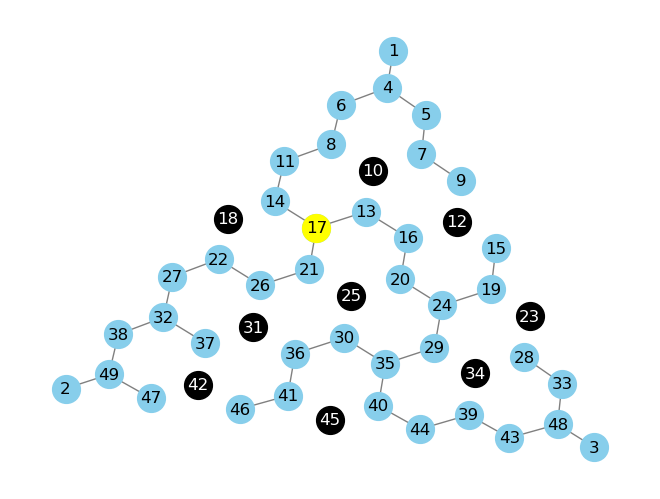

Barriers: frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})
Path lengths: [15, 19, 17]


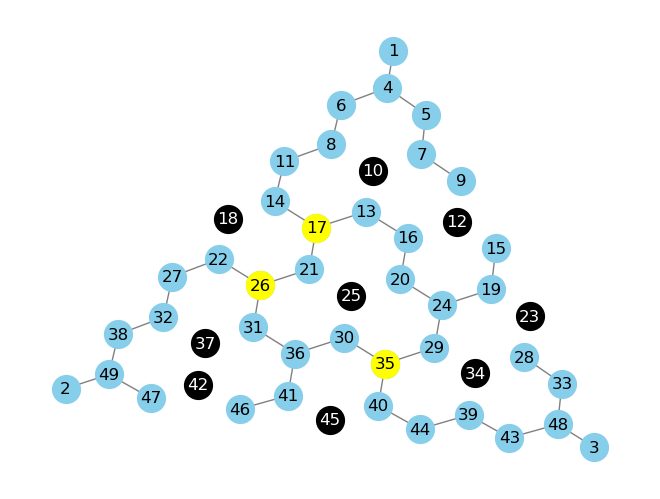

Barriers: frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26})
Path lengths: [21, 19, 15]


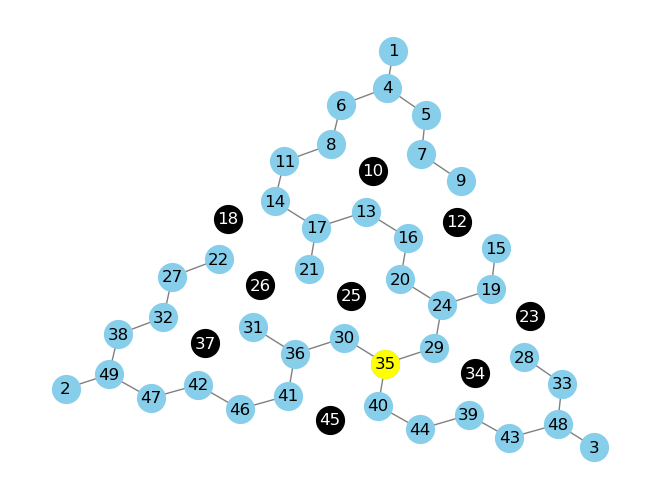

Barriers: frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25})
Path lengths: [17, 19, 15]


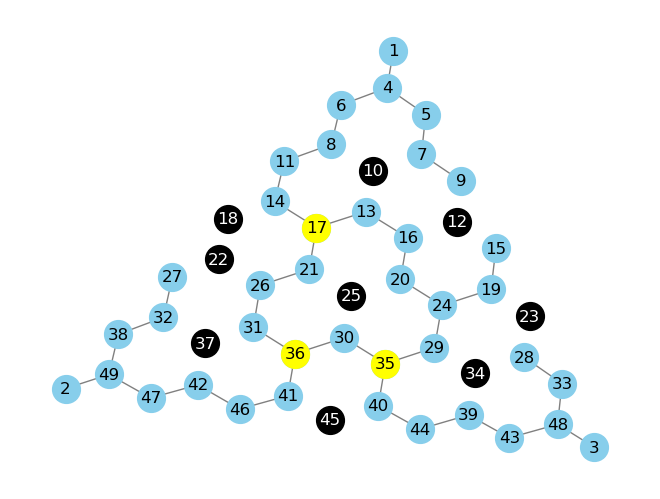

Barriers: frozenset({34, 35, 37, 10, 12, 45, 18, 22, 25})
Path lengths: [17, 17, 21]


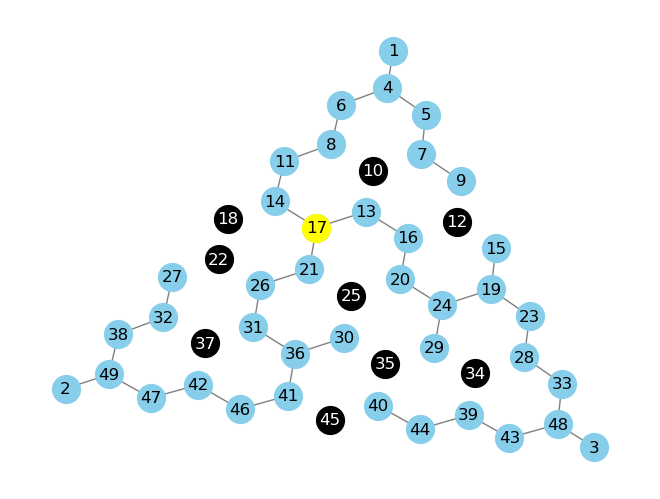

In [5]:
from hex_maze_utils import get_barrier_sequence, df_lookup, plot_hex_maze

original_barriers = {34, 10, 42, 12, 45, 18, 23, 25, 31}

# Given a set of original barriers, get a potential barrier sequence
barrier_sequence = get_barrier_sequence(df, original_barriers, min_hex_diff=8, max_sequence_length=5)

print(f"Potential barrier sequence: {barrier_sequence}")

# Plot all of the mazes in the sequence. 
for bars in barrier_sequence:
    print(f"Barriers: {bars}")
    print(f"Path lengths: {df_lookup(df, bars, 'reward_path_lengths')}")
    plot_hex_maze(bars)

### Getting all possible barrier sequence given an initial barrier set

What if we don't like the given sequence? We can get all possible barrier sequences to investigate them further. 

Note that this can be pretty computationally expensive to run, expecially if we relax the "min_hex_diff" criteria and end up with a lot of sequences

Original path lengths: [15, 19, 21]


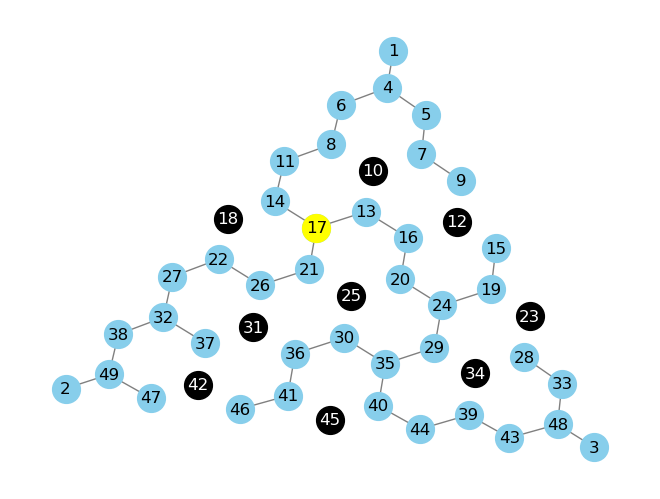

Current set: {34, 10, 42, 12, 45, 18, 23, 25, 31}
Visited: {frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31})}
Current set: frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})
Visited: {frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 42, 12, 45, 18, 25, 31})
Visited: {frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 25, 31})}
Current set: frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26})
Visited: {frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozen

Current set: frozenset({34, 37, 39, 10, 12, 45, 46, 18, 25})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 39, 10, 12, 45, 18, 25, 26}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 39, 10, 12, 45, 46, 18, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 36, 37, 39, 10, 12, 45, 18, 25})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 39, 10, 12, 45, 18, 25, 26}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 36, 37, 39, 10, 12, 45, 18, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 39, 10, 12, 45, 18, 25, 29})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 39, 10, 12, 45, 18, 25, 26}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 39, 10, 12, 45, 18, 25, 29})}
Current set: frozenset({34, 37, 39, 10, 42, 12, 45, 

Current set: frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 40, 10, 12, 45, 18, 25, 26})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 40, 10, 12, 45, 18, 25, 26}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 44, 45, 12, 18, 25, 26})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 23, 25, 26}), frozenset({34, 37, 10, 44, 45, 12, 18, 25, 26}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 39, 10, 12, 45, 18, 25, 26})
Visited: {frozenset({34, 37, 10, 12, 45,

Current set: frozenset({34, 37, 10, 42, 12, 44, 45, 18, 21})
Visited: {frozenset({34, 37, 10, 42, 12, 44, 45, 18, 21}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 44, 18, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 42, 12, 45, 18, 21, 24})
Visited: {frozenset({34, 37, 10, 42, 12, 44, 45, 18, 21}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 21, 24}), frozenset({34, 37, 10, 42, 12, 45, 44, 18, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 42, 12, 45, 18, 21, 23})
Visited: {frozenset({34, 37, 10, 42, 12, 44, 45, 18, 21}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 42, 12, 45, 18, 21, 23}), frozenset({34, 37, 10, 42, 12, 45, 44, 18, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 42, 12, 45, 18, 21, 28})
Visited: {frozenset({34, 37, 10, 42, 12,

Current set: frozenset({34, 35, 37, 10, 12, 45, 18, 22, 25})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 12, 45, 18, 21, 23, 25}), frozenset({34, 35, 37, 10, 12, 45, 18, 22, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 12, 45, 18, 22, 25, 30})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 12, 45, 18, 21, 23, 25}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25}), frozenset({34, 37, 10, 12, 45, 18, 22, 25, 30})}
Current set: frozenset({34, 37, 10, 12, 45, 18, 22, 23, 30})
Visited: {frozenset({34, 37, 10, 12, 45, 18, 22, 23, 25}), frozenset({34, 10, 42, 12, 45, 18, 23, 25, 31}), frozenset({34, 37, 10, 12, 45, 18, 21, 23, 25}), frozenset({34, 37, 10, 12, 45, 18, 22, 23, 30}), frozenset({34, 37, 10, 42, 12, 45, 18, 23, 25})}
Current set: frozenset({34, 37, 10, 12, 45, 22, 23, 

KeyboardInterrupt: 

In [4]:
from hex_maze_utils import find_all_valid_barrier_sequences, df_lookup, plot_hex_maze

original_barriers = {34, 10, 42, 12, 45, 18, 23, 25, 31}

print(f"Original path lengths: {df_lookup(df, original_barriers, 'reward_path_lengths')}")
plot_hex_maze(original_barriers)

# Given a set of original barriers, get all potential barrier sequences
all_barrier_sequences = find_all_valid_barrier_sequences(df, original_barriers, min_hex_diff=8, max_sequence_length=5)

for sequence in all_barrier_sequences:
    print(f"Potential barrier sequence: {sequence}")

In [ ]:
#Trash below here